In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
#Cargamos los datos
events = pd.read_csv('Resumen\events.csv', low_memory = False)

In [3]:
#Cabecera
events.head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#convierto los tipos
events.timestamp = pd.to_datetime(events['timestamp'],format='%Y-%m-%d %H:%M:%S')
events.event = events.event.astype('category')
events.model = events.model.astype('category')
events.storage = events.storage.astype('category')
events.campaign_source = events.campaign_source.astype('category')
events.search_engine = events.search_engine.astype('category')
events.channel = events.channel.astype('category')
events.condition = events.condition.astype('category')
events.new_vs_returning = events.new_vs_returning.astype('category')
events.color = events.color.astype('category')
events.city = events.city.astype('category')
events.region = events.region.astype('category')
events.country = events.country.astype('category')
#descarto las que no me interesan
events.drop(columns=['url','staticpage','skus','device_type','browser_version','operating_system_version','screen_resolution'],inplace=True)
events.dtypes

timestamp           datetime64[ns]
event                     category
person                      object
sku                         object
model                     category
condition                 category
storage                   category
color                     category
search_term                 object
campaign_source           category
search_engine             category
channel                   category
new_vs_returning          category
city                      category
region                    category
country                   category
dtype: object

In [5]:
#paso el timestamp a datetimeindex
events.set_index(pd.DatetimeIndex(events.timestamp),inplace=True)
#cantidad de eventos simultaneos -> me parece muy alto esto...revisar
events.index.duplicated().sum()

217483

In [6]:
#separo el datetime
events['year'] = events.index.year
events['month'] = events.index.month
events['day'] = events.index.day
events['hour'] = events.index.hour
events['minute'] = events.index.minute

#events.sort_values(by='timestamp',inplace=True,ascending=True)
events.sort_index(ascending=True,inplace=True)

In [7]:
#Me quedo con los eventos de mayo
filtro = events[(events.index > '2018-05-01 00:00:00')]
filtro = filtro[(filtro.index < '2018-06-01 00:00:00')]
filtro

,timestamp,event,person,sku,model,condition,storage,color,search_term,campaign_source,...,channel,new_vs_returning,city,region,country,year,month,day,hour,minute
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:03,2018-05-01 00:00:03,searched products,9cb8a09c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:09,2018-05-01 00:00:09,viewed product,f585941e,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:16,2018-05-01 00:00:16,searched products,9cb8a09c,NaN,NaN,NaN,NaN,NaN,Samsung s6,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:18,2018-05-01 00:00:18,viewed product,f585941e,9274.0,Samsung Galaxy J7 Prime,Excelente,32GB,Preto,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:23,2018-05-01 00:00:23,visited site,7017d3d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,Returning,Sertaozinho,Sao Paulo,Brazil,2018,5,1,0,0
2018-05-01 00:00:24,2018-05-01 00:00:24,ad campaign hit,7017d3d2,NaN,NaN,NaN,NaN,NaN,NaN,google,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:31,2018-05-01 00:00:31,checkout,f585941e,9274.0,Samsung Galaxy J7 Prime,Excelente,32GB,Preto,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:36,2018-05-01 00:00:36,viewed product,0bb3e374,6413.0,Samsung Galaxy J7,Bom,16GB,Dourado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0
2018-05-01 00:00:44,2018-05-01 00:00:44,viewed product,0bb3e374,6412.0,Samsung Galaxy J7,Muito Bom,16GB,Dourado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,1,0,0


In [8]:
#armo la tabla por evento por dia
per_event_daycount = filtro.groupby(['event','day']).agg({'day':'count'}).unstack()
per_event_daycount.columns = per_event_daycount.columns.droplevel(0)
per_event_daycount.fillna(value=0,inplace=True)
per_event_daycount.astype(dtype='int64',inplace=True)

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,525,560,649,597,597,582,613,732,815,883,...,1937,1663,1435,1461,1109,1106,1560,1912,1861,1885
brand listing,438,858,909,811,867,702,861,996,1125,1313,...,2244,1752,1586,1439,1283,1204,1700,1811,2300,1788
checkout,87,111,102,90,98,112,140,167,155,202,...,904,866,720,723,505,536,771,1062,1022,950
conversion,13,9,14,12,7,6,15,14,36,32,...,8,3,4,3,3,1,5,10,13,7
generic listing,417,550,564,512,479,514,724,670,716,858,...,1364,1201,987,1042,884,943,1197,1448,1412,1327
lead,2,0,1,3,2,1,3,0,3,2,...,2,5,2,6,1,3,2,4,5,0
search engine hit,310,343,328,353,340,333,378,435,471,519,...,1270,1026,937,902,690,829,1050,1232,1129,1108
searched products,309,318,282,384,407,441,421,575,555,660,...,1129,1008,934,942,737,779,871,1134,1113,1306
staticpage,18,26,45,21,22,26,48,52,77,58,...,68,34,27,47,25,24,49,63,51,49


In [9]:
per_event_daycount.describe()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,577.18,700.27,748.36,711.36,681.18,617.00,802.55,918.55,960.36,"1,102.82",...,"2,018.36","1,756.36","1,589.45","1,547.45","1,265.18","1,187.00","1,742.73","2,103.45","2,121.91","1,896.55"
std,"1,056.41","1,207.36","1,322.43","1,244.19","1,148.36",988.85,"1,365.11","1,588.94","1,606.77","1,862.56",...,"3,203.83","2,838.13","2,647.65","2,528.60","2,137.02","1,826.17","2,927.36","3,542.58","3,558.48","3,025.19"
min,2.00,0.00,1.00,3.00,2.00,1.00,3.00,0.00,3.00,2.00,...,2.00,3.00,2.00,3.00,1.00,1.00,2.00,4.00,5.00,0.00
25%,52.50,68.50,73.50,55.50,60.00,69.00,94.00,109.50,116.00,130.00,...,486.00,450.00,373.50,385.00,265.00,280.00,410.00,562.50,536.50,499.50
50%,310.00,343.00,328.00,384.00,407.00,441.00,421.00,575.00,555.00,660.00,...,"1,270.00","1,026.00",937.00,942.00,737.00,829.00,"1,050.00","1,232.00","1,129.00","1,306.00"
75%,481.50,628.50,682.00,638.50,620.00,578.00,773.50,803.00,882.00,965.50,...,"1,916.50","1,674.00","1,456.00","1,450.00","1,117.00","1,111.00","1,583.00","1,860.50","1,854.50","1,731.50"
max,"3,702.00","4,231.00","4,623.00","4,362.00","4,031.00","3,496.00","4,802.00","5,589.00","5,662.00","6,556.00",...,"11,380.00","10,077.00","9,375.00","8,976.00","7,555.00","6,516.00","10,359.00","12,552.00","12,587.00","10,767.00"


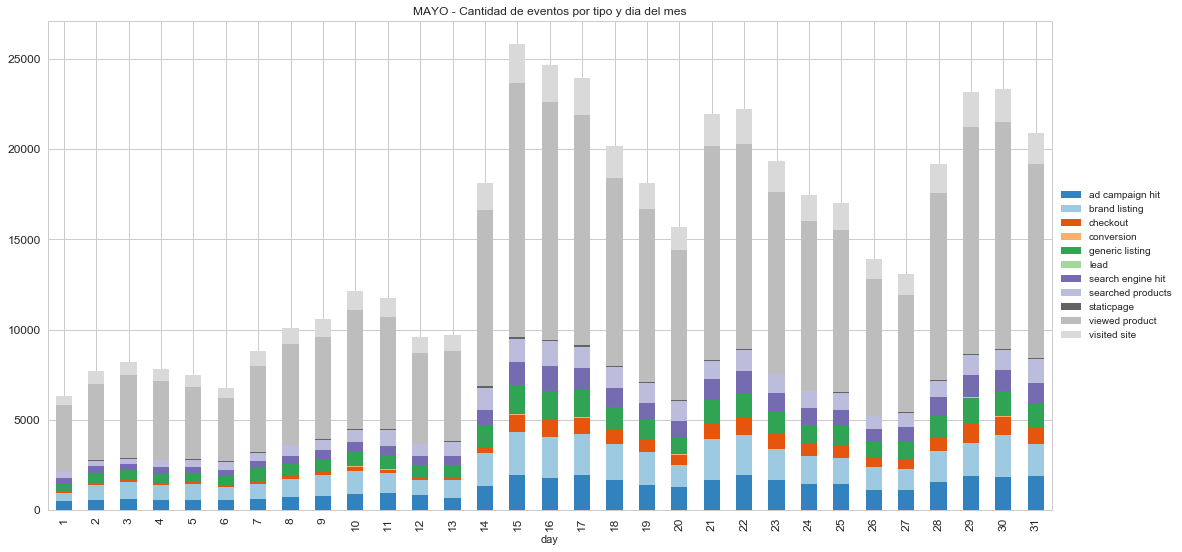

In [10]:
graph = per_event_daycount.transpose().plot.bar(stacked=True,figsize=(18,9),fontsize=12,colormap='tab20c')
plt.title('MAYO - Cantidad de eventos por tipo y dia del mes')
graph.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

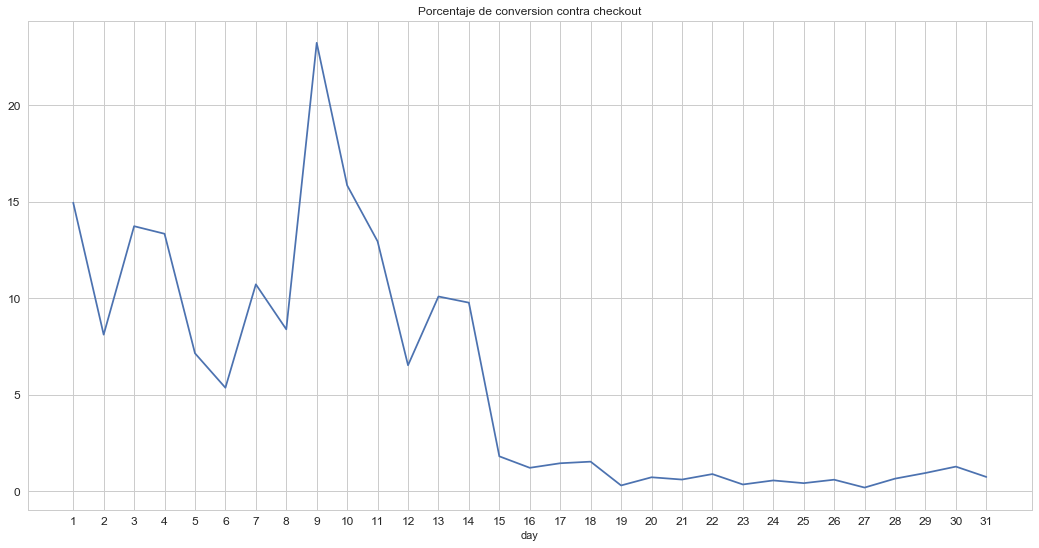

In [11]:
#Calculo las relaciones día a día

#(viewed vs conversion)
prepared  = per_event_daycount.transpose()[['checkout','conversion']]
prepared.fillna(value=0,inplace=True)
prepared.astype(dtype='int64',inplace=True)

#(checkout vs conversion)
prepared  = per_event_daycount.transpose()[['checkout','conversion']]
checkout_to_conv = ((prepared['conversion'] * 100) / prepared['checkout'])
#Comparo en un gráfico de líneas
plot = checkout_to_conv.plot(figsize=(18,9),fontsize=12,title='Porcentaje de conversion contra checkout',xticks=checkout_to_conv.index)


In [12]:
#cantidad de eventos cada dia (total periodo)
filtro['date'] = filtro.index.date
filtro.head(1)


,timestamp,event,person,sku,model,condition,storage,color,search_term,campaign_source,...,new_vs_returning,city,region,country,year,month,day,hour,minute,date
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:03,2018-05-01 00:00:03,searched products,9cb8a09c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,5,1,0,0,2018-05-01


In [13]:
filtro['event'].describe()

count             474949
unique                11
top       viewed product
freq              253312
Name: event, dtype: object

In [14]:
per_date = filtro.groupby('date').agg({'date':'count'})
per_date.columns = ['date_count']
per_date.describe()

,date_count
count,31.00
mean,"15,320.94"
std,"6,220.91"
min,"6,349.00"
25%,"9,651.50"
50%,"15,696.00"
75%,"20,507.00"
max,"25,797.00"


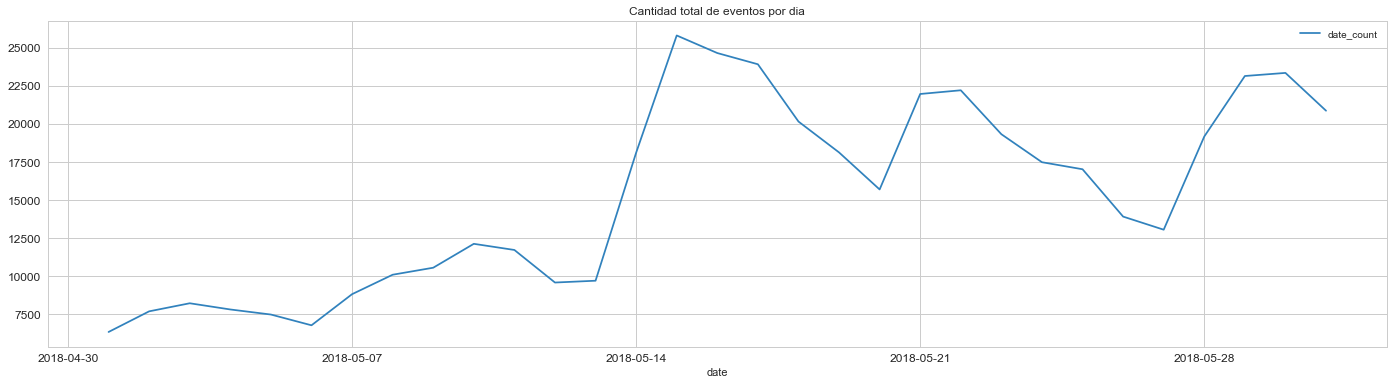

In [15]:
graph = per_date.plot(figsize=(24,6),fontsize=12,colormap='tab20c')
plt.title('Cantidad total de eventos por dia')
#graph.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

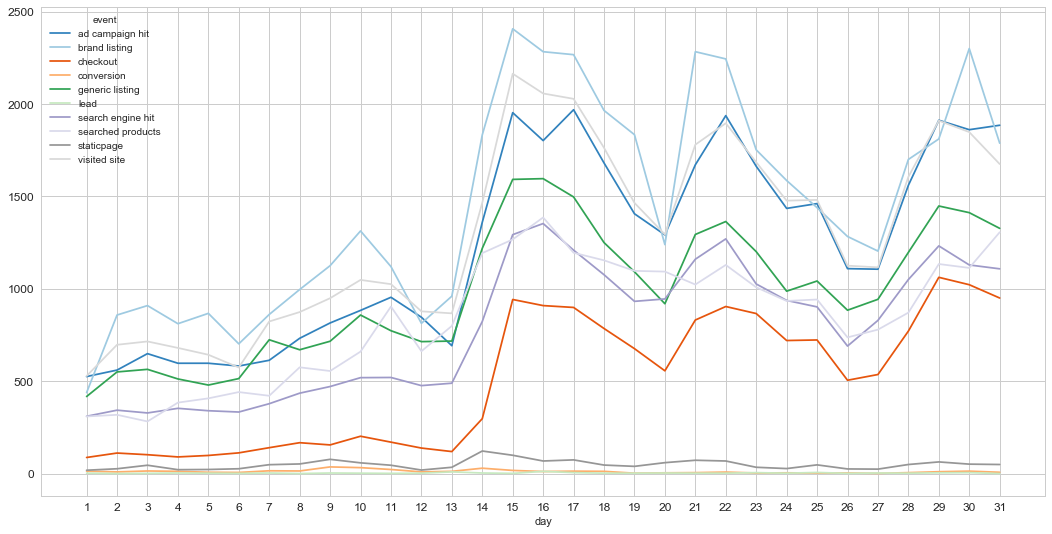

In [16]:
per_event_and_date= filtro.groupby(['event','day']).agg({'day':'count'}).unstack(fill_value=0)
per_event_and_date.drop('viewed product',inplace=True)
per_event_and_date.columns = per_event_and_date.columns.droplevel(0)
per_event_and_date.fillna(value=0,inplace=True)
per_event_and_date.astype(dtype='int64',inplace=True)
per_event_and_date = per_event_and_date.transpose()
per_event_and_date.index
logy = False
subplots = False
graph = per_event_and_date.plot(xticks=per_event_and_date.index,logy=logy,figsize=(18,9),fontsize=12,colormap='tab20c',subplots=subplots)

In [17]:
conversion_por_dia = per_event_and_date.loc['conversion',:]
conversion_por_dia.describe()

KeyError: 'the label [conversion] is not in the [index]'

In [ ]:
graph = conversion_por_dia.plot(figsize=(24,6),fontsize=12,colormap='tab20c')
plt.title('Eventos conversion por dia')
plt.show()